## Created a new notebook
# by Sergii Surnin
# (C) 2017

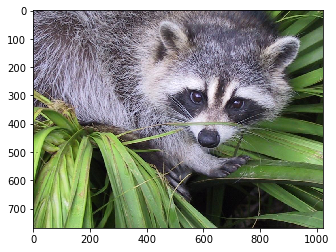

In [3]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()


In [4]:
import sys

sys.executable


'C:\\Program Files\\Anaconda3\\python.exe'

In [5]:
from scipy import misc
import numpy as np
face = misc.imread('face.png')
misc.imsave('face.png', face) # First we need to create the PNG file

face = misc.imread('face.png')
type(face) 
#face.shape, face.dtype

face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

face_from_raw.shape = (768, 1024, 3)

#face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))

for i in range(10):
    im = np.random.randint(0, 255, 10000).reshape((100, 100))
    misc.imsave('random_%02d.png' % i, im)
from glob import glob
filelist = glob('random*.png')
filelist.sort()

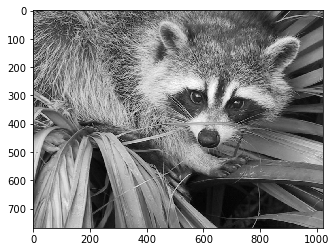

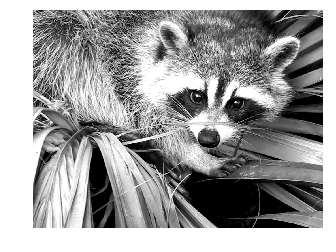

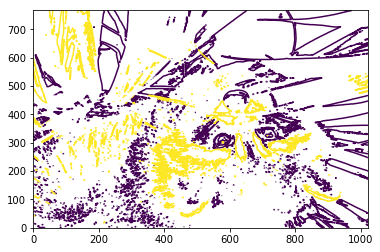

In [6]:
from scipy import misc
import numpy as np
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
# Remove axes and ticks
plt.axis('off')
plt.show()

plt.contour(f, [50, 200])
plt.show()

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open('face.png')
data = np.asarray(
    image.resize((300, 300), Image.NEAREST), 
    dtype='uint8'
)

data = np.stack([data, data, data], axis=2)
data = data/255.0

data.max()
#plt.imshow(data); # doesn't work - throws the exception
#plt.axis('off');

1.0

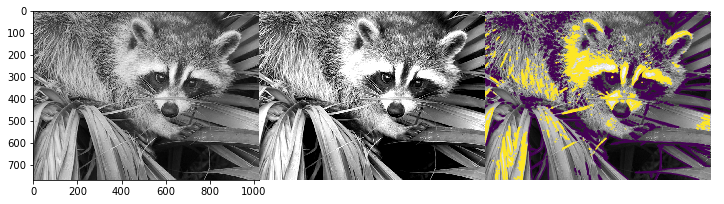

In [8]:
import scipy.misc
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)

plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)

plt.subplot(132)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')

plt.subplot(133)
plt.imshow(f, cmap=plt.cm.gray)
plt.contour(f, [50, 200])
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01, left=0.05,
                    right=0.99)
plt.show()

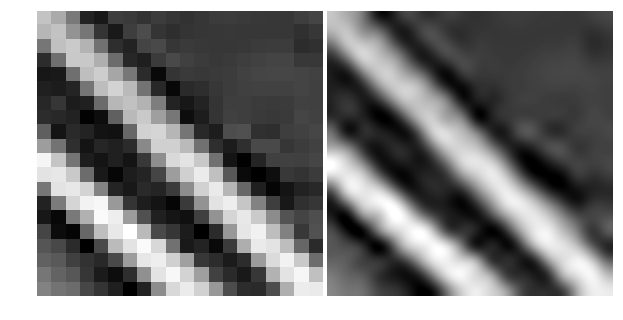

In [9]:
import scipy.misc
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='lanczos')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
plt.show()

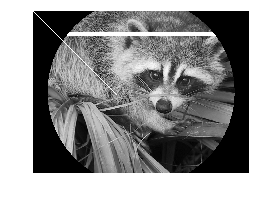

In [10]:
import numpy as np
import scipy
import scipy.misc
import matplotlib.pyplot as plt

face = scipy.misc.face(gray=True)
face[10:13, 20:23]
face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/2)**2 + (Y - ly/2)**2 > lx*ly/4
face[mask] = 0
face[range(400), range(400)] = 255

plt.figure(figsize=(3, 3))
plt.axes([0, 0, 1, 1])
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

In [12]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('../train/001.ak47/001_0001.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='ak-47', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

Using TensorFlow backend.


In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras import backend as K

# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = '../train_small'
validation_data_dir = '../validation_small'
nb_train_samples = 372
nb_validation_samples = 99
epochs = 16
batch_size = 16
rescale_koef = 1. / 255

'''
if K.image_data_format() == 'channels_first':   # actually, 'channels_last'
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
'''
print(K.image_data_format()) #channels_last, so:
current_input_shape = (img_width, img_height, 3)  #channels_last
    
print(current_input_shape)


model = Sequential()

model.add(Flatten(input_shape=current_input_shape) )
model.add(Dense(10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(5, activation='softmax'))

'''
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
'''

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=rescale_koef,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=rescale_koef)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

model.count_params()

model.summary()

channels_last
(64, 64, 3)
Found 372 images belonging to 5 classes.
Found 99 images belonging to 5 classes.
Epoch 1/16
23/23 [==============================] - 4s - loss: 4.4876 - acc: 0.2228 - val_loss: 1.6079 - val_acc: 0.2812